<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Supervised_learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning
> **Machine Learning** is the process whereby computers learn to make decisions from data, without being explicitly programmed. eg. email as spam or not spam
**Unsupervised Learning** is the process of discovering hidden patterns from unlabeled data. eg Clustering.
**Supervised Learning** Uses labeled data with features to train the model.Then given the features for unseen data it predicts a value or a lbel.

* Supervised learning can be of 2 types
  * **Classification** The target variable is categorical. Sometimes it is binary classification
  * **Regression** The target variable is continous. eg. house values

* Key steps in the process
  * Build a model
  * Model learns from the labeled data (fit step)
  * Pass the unseen data as input
  * Predict labels based on feature values in unseen data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### KNN classification
* K Nearest Neighbors
* Based on distance and closeness of points
* KNN decides classification label based on n-nearest points.
* If the majority of n nearest points is labeled one way then the point will also be labelled that way.


In [2]:
churn_df=pd.read_csv('https://assets.datacamp.com/production/repositories/5981/datasets/8582db71ec282f17c504c8eb794d54758fd8d5d8/telecom_churn_clean.csv')

In [3]:
churn_df.sample(5)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
790,790,92,415,1,1,45,281.1,88,47.79,198.0,103,16.83,94.3,76,4.24,7.5,3,2.03,0,0
1329,1329,137,415,0,0,0,141.1,91,23.99,147.2,100,12.51,254.7,75,11.46,8.0,7,2.16,2,0
1173,1173,109,408,0,0,0,222.2,113,37.77,218.5,122,18.57,266.0,88,11.97,10.9,5,2.94,1,0
2661,2661,197,415,0,0,0,233.9,96,39.76,218.9,111,18.61,182.9,109,8.23,9.5,3,2.57,0,0
2254,2254,97,415,0,1,28,202.3,97,34.39,69.2,84,5.88,257.6,64,11.59,6.7,3,1.81,1,0


### General Model workflow

In [4]:
y=churn_df['churn']
X=churn_df.loc[:,['total_day_minutes','total_eve_minutes']]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123,stratify=y)

In [6]:
# Fit the model and generate predictions
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [7]:
# Score the model fit
model.score(X_test,y_test)

0.868

In [10]:
# Now running in a loop 
n =[4,5,6,7,8,9,10,11,12,13,14,15]
res={}
for i in n:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  score=knn.score(X_test,y_test)
  res[i]=score

In [11]:
res

{4: 0.866,
 5: 0.868,
 6: 0.869,
 7: 0.87,
 8: 0.873,
 9: 0.871,
 10: 0.874,
 11: 0.874,
 12: 0.876,
 13: 0.874,
 14: 0.873,
 15: 0.871}

> Clearly n=12 gives the highest accuracy

In [12]:
res.values()

dict_values([0.866, 0.868, 0.869, 0.87, 0.873, 0.871, 0.874, 0.874, 0.876, 0.874, 0.873, 0.871])

### Model fit
* Accuracy is not always a good way to assess model fit, especially in cases of class imbalance. eg. fraudelent bank transactions. if 1% of all transactions are frauslent then even a naive model (picking at random) will have a 99% accuracy.
* For confusion matrix, the class of interest is the positive class.
* **Precision** -: TP/(TP+FP). High precision means having a lower number of legitimate transactions being labelled as frauds in the bank example.
* **Recall** -: TP/(TP+FN). Lower false negative rate.
* **F1 score**-: (Precision*Recall)/(Precision+Recall)

  * from sklearn.metrics import classification_report,confusion_matrix
  * confusion_matrix(y_test,y_pred)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [43]:
sugar=pd.read_csv('https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv')

In [44]:
sugar.drop(columns='glucose',inplace=True)

In [45]:
y=sugar.diabetes
X=sugar.drop(columns='diabetes')

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [25]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [26]:
y_pred=knn.predict(X_test)

In [28]:
confusion_matrix(y_test,y_pred)

array([[88, 11],
       [37, 18]])

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79        99
           1       0.62      0.33      0.43        55

    accuracy                           0.69       154
   macro avg       0.66      0.61      0.61       154
weighted avg       0.67      0.69      0.66       154



In [38]:
y_predproba=knn.predict_proba(X_test)[:,1]

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predproba)

0.7565656565656567

### Logistic Regression
* Logistic regression is used for binary classification problems.
* Creates a linear decision boundary (nearly linear)
* ROC-AUC curve is Fpr vs TPR curve.
* Area under this curve is 1 for the perfect model

In [47]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [48]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred_proba=logreg.predict_proba(X_test)[:,1]

In [52]:
roc_auc_score(y_test,y_pred_proba)

0.8053259871441689

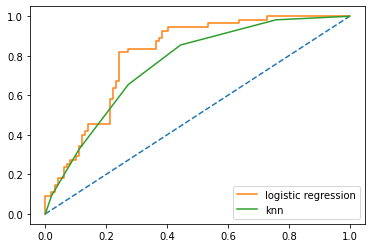

In [68]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
fpr1,tpr1,tresholds1=roc_curve(y_test,y_predproba)
fig,ax=plt.subplots()
ax.plot([0,1],[0,1],'--')
ax.plot(fpr,tpr,label='logistic regression')
ax.plot(fpr1,tpr1,label='knn')
plt.legend()